In [2]:
import numpy as np
import pandas as pd
from itertools import product

In [2]:
new_data=pd.read_csv('new_data.csv')
new_data.drop(['lag_median_price','lag_item_cnt_month','lag_shop_sales','lag_item_sales'],axis=1,inplace=True)
new_data.head()

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month
0,0,12,1,0.0,0.0,0,0,55,2,2
1,0,19,0,0.0,0.0,0,0,40,0,1
2,0,27,0,0.0,0.0,0,0,19,1,1
3,0,27,1,0.0,0.0,0,0,19,1,2
4,0,28,0,0.0,0.0,0,0,30,1,1


In [3]:
cols=['shop_id','date_block_num']
all_shops=new_data.shop_id.unique()
all_dates=new_data.date_block_num.unique()
shop_sales=pd.DataFrame(np.vstack(np.array(list(product(*[all_shops,all_dates])),dtype='int32')),columns=cols,dtype=np.int32)
shop_sales=shop_sales.merge(new_data[['shop_id','date_block_num','item_cnt_month']],on=cols,how='left').sort_values(cols)
shop_sales=shop_sales.groupby(cols).item_cnt_month.sum().reset_index()

shop_sales['lag_shop_sales_1']=shop_sales.groupby('shop_id').item_cnt_month.shift(1)
shop_sales['lag_shop_sales_2']=shop_sales.groupby('shop_id').item_cnt_month.shift(2)
shop_sales['lag_shop_sales_3']=shop_sales.groupby('shop_id').item_cnt_month.shift(3)
shop_sales['lag_shop_sales_6']=shop_sales.groupby('shop_id').item_cnt_month.shift(6)
shop_sales['lag_shop_sales_9']=shop_sales.groupby('shop_id').item_cnt_month.shift(9)
shop_sales['lag_shop_sales_12']=shop_sales.groupby('shop_id').item_cnt_month.shift(12)

shop_sales.drop('item_cnt_month',axis=1,inplace=True)
new_data=new_data.merge(shop_sales,on=cols,how='left')
new_data.head()

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,lag_shop_sales_1,lag_shop_sales_2,lag_shop_sales_3,lag_shop_sales_6,lag_shop_sales_9,lag_shop_sales_12
0,0,12,1,0.0,0.0,0,0,55,2,2,5578.0,NaN,NaN,NaN,NaN,NaN
1,0,19,0,0.0,0.0,0,0,40,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,0,27,0,0.0,0.0,0,0,19,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,27,1,0.0,0.0,0,0,19,1,2,5578.0,NaN,NaN,NaN,NaN,NaN
4,0,28,0,0.0,0.0,0,0,30,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cols=['item_id','date_block_num']
all_items=new_data.item_id.unique()
all_dates=new_data.date_block_num.unique()
item_sales=pd.DataFrame(np.vstack(np.array(list(product(*[all_items,all_dates])),dtype='int32')),columns=cols,dtype=np.int32)
item_sales=item_sales.merge(new_data[['item_id','date_block_num','item_cnt_month']],on=cols,how='left').sort_values(cols)  

In [5]:
item_sales=item_sales.groupby(cols).item_cnt_month.sum().reset_index()

item_sales['lag_item_sales_1']=item_sales.groupby('item_id').item_cnt_month.shift(1)
item_sales['lag_item_sales_2']=item_sales.groupby('item_id').item_cnt_month.shift(2)
item_sales['lag_item_sales_3']=item_sales.groupby('item_id').item_cnt_month.shift(3)
item_sales['lag_item_sales_6']=item_sales.groupby('item_id').item_cnt_month.shift(6)
item_sales['lag_item_sales_9']=item_sales.groupby('item_id').item_cnt_month.shift(9)
item_sales['lag_item_sales_12']=item_sales.groupby('item_id').item_cnt_month.shift(12)

item_sales.drop('item_cnt_month',axis=1,inplace=True)

In [6]:
new_data=new_data.merge(item_sales,on=cols,how='left')
new_data.head()

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,...,lag_shop_sales_3,lag_shop_sales_6,lag_shop_sales_9,lag_shop_sales_12,lag_item_sales_1,lag_item_sales_2,lag_item_sales_3,lag_item_sales_6,lag_item_sales_9,lag_item_sales_12
0,0,12,1,0.0,0.0,0,0,55,2,2,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,0,19,0,0.0,0.0,0,0,40,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,27,0,0.0,0.0,0,0,19,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,27,1,0.0,0.0,0,0,19,1,2,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
4,0,28,0,0.0,0.0,0,0,30,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
new_data=new_data.fillna(0)

In [8]:
index_cols=['shop_id','item_id','date_block_num']
prev_sales=pd.read_pickle('prev_sales.pkl')
prev_sales.drop('item_cnt_month',axis=1,inplace=True)
new_data=new_data.merge(prev_sales,on=index_cols,how='left')

In [9]:
prev_rev=pd.read_pickle('prev_revenue.pkl')
prev_rev.drop('median_price',axis=1,inplace=True)
prev_rev.drop('revenue',axis=1,inplace=True)
new_data=new_data.merge(prev_rev,on=index_cols,how='left')

In [3]:
# new_data.to_pickle('new_data_rev.pkl')
new_data=pd.read_pickle('new_data_rev.pkl')
new_data.head().T

,0,1,2,3,4
shop_id,0.0,0.0,0.0,0.0,0.0
item_id,12.0,19.0,27.0,27.0,28.0
date_block_num,1.0,0.0,0.0,1.0,0.0
median_price,0.0,0.0,0.0,0.0,0.0
item_cnt_month,0.0,0.0,0.0,0.0,0.0
City,0.0,0.0,0.0,0.0,0.0
Type,0.0,0.0,0.0,0.0,0.0
item_category_id,55.0,40.0,19.0,19.0,30.0
main_cat,2.0,0.0,1.0,1.0,1.0
month,2.0,1.0,1.0,2.0,1.0


In [6]:
new_data.drop('revenue',axis=1,inplace=True)
new_data=new_data.fillna(0)
new_data.head()

KeyError: "['revenue'] not found in axis"

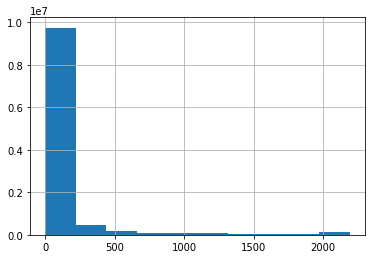

In [8]:
lb,ub = np.percentile(new_data.median_price,(1,99))
new_data['median_price']=np.clip(new_data.median_price,lb,ub)
new_data.median_price.hist()

In [198]:
rel_data = new_data[new_data.median_price!=0]
rel_data['price_last_digit']=(rel_data.median_price.astype(str).str)[1:]
rel_data['comb']=rel_data.shop_id.astype(str)+'_'+rel_data.item_id.astype(str)
rel_data

C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,...,lag_cnt_month_9,lag_cnt_month_12,revenue_lag_1,revenue_lag_2,revenue_lag_3,revenue_lag_6,revenue_lag_9,revenue_lag_12,comb,price_last_digit
7,0,30,1,265.0,31.0,0,0,40,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0_30,65.0
8,0,31,1,434.0,11.0,0,0,37,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0_31,34.0
9,0,32,0,221.0,6.0,0,0,40,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0_32,21.0
10,0,32,1,221.0,10.0,0,0,40,0,2,...,0.0,0.0,1326.0,0.0,0.0,0.0,0.0,0.0,0_32,21.0
11,0,33,0,347.0,3.0,0,0,37,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0_33,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913785,59,22164,27,699.0,2.0,24,5,37,0,4,...,0.0,0.0,749.0,1498.0,0.0,0.0,0.0,0.0,59_22164,99.0
10913788,59,22164,30,699.0,1.0,24,5,37,0,7,...,0.0,0.0,0.0,0.0,1398.0,0.0,0.0,0.0,59_22164,99.0
10913820,59,22167,9,299.0,1.0,24,5,49,3,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59_22167,99.0
10913822,59,22167,11,299.0,2.0,24,5,49,3,12,...,0.0,0.0,0.0,299.0,0.0,0.0,0.0,0.0,59_22167,99.0


In [199]:
lb,ub=np.percentile(rel_data.lag_item_sales_1,(0,99))
rel_data.lag_item_sales_1=np.clip(rel_data.lag_item_sales_1,lb,ub)
rel_data.lag_item_sales_2=np.clip(rel_data.lag_item_sales_2,lb,ub)
rel_data.lag_item_sales_3=np.clip(rel_data.lag_item_sales_3,lb,ub)
rel_data.lag_item_sales_6=np.clip(rel_data.lag_item_sales_6,lb,ub)
rel_data.lag_item_sales_9=np.clip(rel_data.lag_item_sales_9,lb,ub)
rel_data.lag_item_sales_12=np.clip(rel_data.lag_item_sales_12,lb,ub)

In [200]:
lb,ub=(0,20)
rel_data.lag_cnt_month_1=np.clip(rel_data.lag_cnt_month_1,lb,ub)
rel_data.lag_cnt_month_2=np.clip(rel_data.lag_cnt_month_2,lb,ub)
rel_data.lag_cnt_month_3=np.clip(rel_data.lag_cnt_month_3,lb,ub)
rel_data.lag_cnt_month_6=np.clip(rel_data.lag_cnt_month_6,lb,ub)
rel_data.lag_cnt_month_9=np.clip(rel_data.lag_cnt_month_9,lb,ub)
rel_data.lag_cnt_month_12=np.clip(rel_data.lag_cnt_month_12,lb,ub)


In [201]:
lb,ub=np.percentile(rel_data.revenue_lag_1,(0,99))
rel_data.revenue_lag_1=np.clip(rel_data.revenue_lag_1,lb,ub)
rel_data.revenue_lag_2=np.clip(rel_data.revenue_lag_2,lb,ub)
rel_data.revenue_lag_3=np.clip(rel_data.revenue_lag_3,lb,ub)
rel_data.revenue_lag_6=np.clip(rel_data.revenue_lag_6,lb,ub)
rel_data.revenue_lag_9=np.clip(rel_data.revenue_lag_9,lb,ub)
rel_data.revenue_lag_12=np.clip(rel_data.revenue_lag_12,lb,ub)

In [202]:
rel_data.item_cnt_month=np.clip(rel_data.item_cnt_month,0,20)

C:\Users\amoiz\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [203]:
val_filter = (rel_data.date_block_num >= 33)

X_train = rel_data[~val_filter]
y_train = rel_data[~val_filter]['item_cnt_month']

X_val = rel_data[val_filter]
y_val = rel_data[val_filter]['item_cnt_month']

In [204]:
#encoding features
X_train['item_encode']=X_train.groupby('item_id')['item_cnt_month'].transform('mean')
X_train['shop_encode']=X_train.groupby('shop_id')['item_cnt_month'].transform('mean')
X_train['item_shop_encode']=X_train.groupby('comb')['item_cnt_month'].transform('mean')
X_train.head()

C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,...,revenue_lag_2,revenue_lag_3,revenue_lag_6,revenue_lag_9,revenue_lag_12,comb,price_last_digit,item_encode,shop_encode,item_shop_encode
7,0,30,1,265.0,20.0,0,0,40,0,2,...,0.0,0.0,0.0,0.0,0.0,0_30,65.0,3.478170,2.3296,20.0
8,0,31,1,434.0,11.0,0,0,37,0,2,...,0.0,0.0,0.0,0.0,0.0,0_31,34.0,2.657841,2.3296,11.0
9,0,32,0,221.0,6.0,0,0,40,0,1,...,0.0,0.0,0.0,0.0,0.0,0_32,21.0,2.611688,2.3296,8.0
10,0,32,1,221.0,10.0,0,0,40,0,2,...,0.0,0.0,0.0,0.0,0.0,0_32,21.0,2.611688,2.3296,8.0
11,0,33,0,347.0,3.0,0,0,37,0,1,...,0.0,0.0,0.0,0.0,0.0,0_33,47.0,1.493625,2.3296,3.0


In [205]:
X_val['item_encode']=X_val['item_id'].map(X_train.groupby('item_id')['item_cnt_month'].mean())
X_val['shop_encode']=X_val['shop_id'].map(X_train.groupby('shop_id')['item_cnt_month'].mean())
X_val['item_shop_encode']=X_val['comb'].map(X_train.groupby('comb')['item_cnt_month'].mean())
X_val.head()

C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,...,revenue_lag_2,revenue_lag_3,revenue_lag_6,revenue_lag_9,revenue_lag_12,comb,price_last_digit,item_encode,shop_encode,item_shop_encode
32701,2,31,33,399.0,1.0,1,1,37,0,10,...,0.0,0.0,0.0,0.0,0.0,2_31,99.0,2.657841,1.864157,1.750
35808,2,486,33,300.0,3.0,1,1,73,4,10,...,0.0,0.0,300.0,0.0,300.0,2_486,00.0,4.023196,1.864157,1.625
37583,2,787,33,420.0,1.0,1,1,49,3,10,...,0.0,0.0,0.0,0.0,0.0,2_787,20.0,2.750000,1.864157,1.000
37671,2,794,33,2190.0,1.0,1,1,73,4,10,...,0.0,0.0,0.0,0.0,0.0,2_794,190.0,1.545455,1.864157,NaN
39283,2,968,33,58.0,1.0,1,1,40,0,10,...,0.0,0.0,0.0,0.0,0.0,2_968,8.0,2.686192,1.864157,NaN


In [206]:
X_train.drop('item_cnt_month',axis=1,inplace=True)
X_val.drop('item_cnt_month',axis=1,inplace=True)

C:\Users\amoiz\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [207]:
#Something's not right
X_val=X_val.fillna(0)
X_train.drop('comb',axis=1,inplace=True)
X_val.drop('comb',axis=1,inplace=True)

In [208]:
X_train['price_last_digit']=X_train.price_last_digit.astype(float)
X_val['price_last_digit']=X_val.price_last_digit.astype(float)

C:\Users\amoiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)

C:\Users\amoiz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [210]:
y_pred=rf.predict(X_val)

In [211]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred=np.clip(y_pred,0,20)
sqrt(mean_squared_error(y_val,y_pred))

2.666985057848154

In [212]:
pd.DataFrame([X_val.columns,rf.feature_importances_]).T.sort_values(1,ascending=False)

,0,1
36,item_shop_encode,0.502109
16,lag_item_sales_2,0.0933276
21,lag_cnt_month_1,0.0541871
34,item_encode,0.0327825
15,lag_item_sales_1,0.0294668
1,item_id,0.0264558
3,median_price,0.018206
2,date_block_num,0.0176706
8,month,0.016487
9,lag_shop_sales_1,0.0152307


In [213]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(n_jobs=-1)
xg_reg.fit(X_train,y_train)
y_xg_pred=xg_reg.predict(X_val)
y_xg_pred=np.clip(y_xg_pred,0,20)

C:\Users\amoiz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\amoiz\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:18:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [214]:
sqrt(mean_squared_error(y_val,y_xg_pred))

2.4107405586586554

In [215]:
pd.DataFrame([X_val.columns,xg_reg.feature_importances_]).T.sort_values(1,ascending=False)

,0,1
36,item_shop_encode,0.327904
16,lag_item_sales_2,0.199852
21,lag_cnt_month_1,0.127002
17,lag_item_sales_3,0.0631498
15,lag_item_sales_1,0.0320092
2,date_block_num,0.0236237
35,shop_encode,0.0170169
8,month,0.0154488
34,item_encode,0.0153164
10,lag_shop_sales_2,0.0146682
